In [1]:
!ls

ed-titanic-test.csv  ed-titanic-training.csv  nyt-frame.csv  sample_data


# Zadanie 5

In [2]:
import pandas as pd
train = pd.read_csv('ed-titanic-training.csv')
test = pd.read_csv('ed-titanic-test.csv')
train.loc[train['Age'] >= 65, 'Age'] = 4
test.loc[test['Age'] >= 65, 'Age'] = 4

In [3]:
del train['Unnamed: 0']
del test['Unnamed: 0']

In [ ]:
set(test['Age'].values)

{0, 1, 2, 3, 4}

In [ ]:
set(train['Age'].values)

{0, 1, 2, 3, 4}

In [ ]:
train.head(5)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,0,2,0,3,1,1,2,0,3
2,1,3,0,1,0,1,0,0,1,1,4
3,1,1,0,2,0,3,0,1,2,0,3
4,0,3,1,2,0,1,0,0,1,1,1


<Axes: title={'center': 'Pearson Correlation of Features'}>

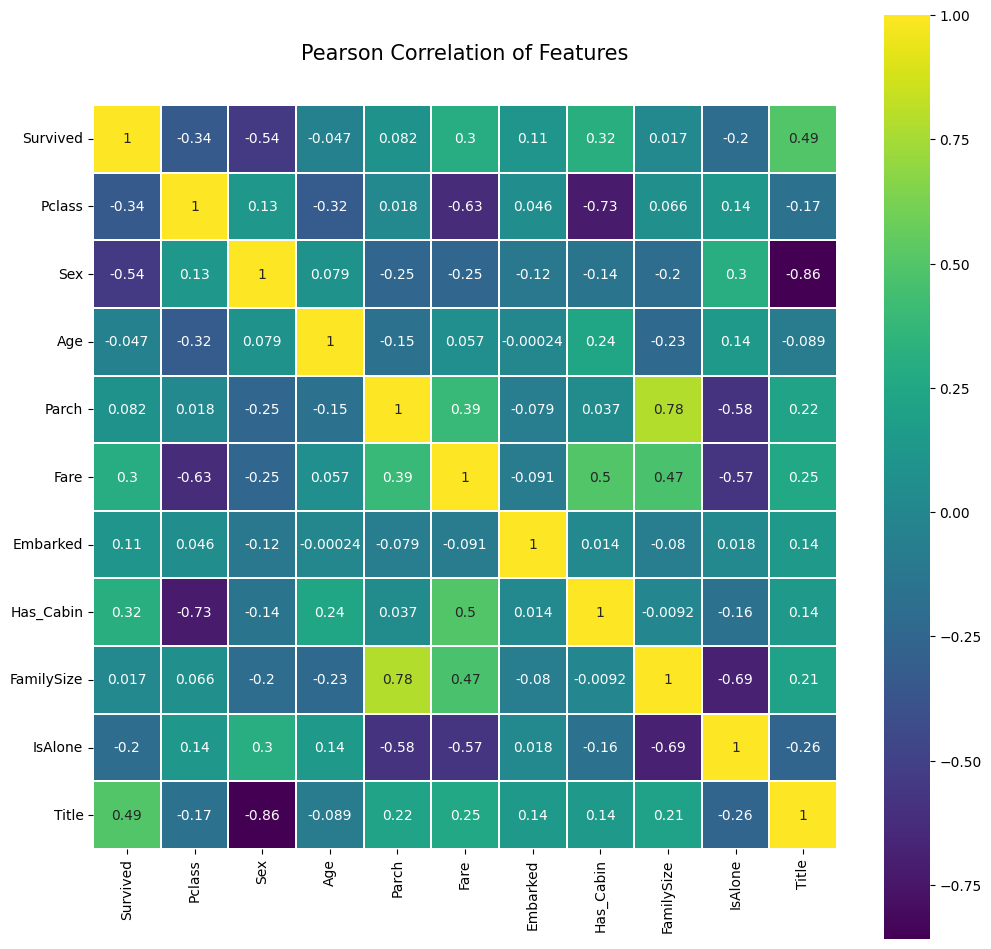

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,
square=True, cmap=colormap, linecolor='white', annot=True)

**Najbardziej skorelowane cechy z przeżywalnością to płeć, tytuł oraz wiek.**

**Najbardziej skorelowane cechy ze sobą to: (Sex, Title) oraz (Parch, FamilySize)**

In [ ]:
train.loc[:, ['Title', 'Survived']].groupby('Title').mean()

,Survived
Title,
1,0.156673
2,0.575000
3,0.793651
4,0.702703
5,0.347826


In [4]:
X_train = train.loc[:, train.columns != 'Survived']
y_train = train.loc[:, 'Survived']

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [6]:
criterions = ['gini', 'entropy']
scores = []
dephts = range(1, 11)

for criterion in criterions:
    for depht in dephts:
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=depht)
        cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
        scores.append((criterion, depht, cv_scores.mean()))

In [ ]:
scores

[('gini', 1, 0.7822846441947565),
 ('gini', 2, 0.7912983770287141),
 ('gini', 3, 0.8305243445692885),
 ('gini', 4, 0.8125468164794007),
 ('gini', 5, 0.8103245942571785),
 ('gini', 6, 0.8059051186017477),
 ('gini', 7, 0.8148564294631709),
 ('gini', 8, 0.8059051186017477),
 ('gini', 9, 0.8238451935081148),
 ('gini', 10, 0.8205118601747815),
 ('entropy', 1, 0.7822846441947565),
 ('entropy', 2, 0.7890511860174781),
 ('entropy', 3, 0.8316479400749064),
 ('entropy', 4, 0.8215355805243446),
 ('entropy', 5, 0.8249188514357053),
 ('entropy', 6, 0.8159800249687891),
 ('entropy', 7, 0.8069787765293382),
 ('entropy', 8, 0.8103745318352059),
 ('entropy', 9, 0.8215730337078652),
 ('entropy', 10, 0.8092759051186018)]

In [7]:
criterions_dummy, dephts, scores = zip(*scores)

In [9]:
best_depht_gini = dephts[scores.index(max(scores[:len(scores) // len(criterions)]))]
print(f"Best depht for {criterions[0]} is {best_depht_gini}.")

Best depht for gini is 3.


In [10]:
best_depht_entropy = dephts[scores.index(max(scores[len(scores) // len(criterions): ]))]
print(f"Best depht for {criterions[1]} is {best_depht_entropy}.")

Best depht for entropy is 3.


In [11]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth=best_depht_entropy, criterion='entropy')
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [12]:
prediction = decision_tree.predict(test)

In [13]:
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [14]:
from numpy import savetxt
savetxt('prediction.csv', prediction, delimiter=',')

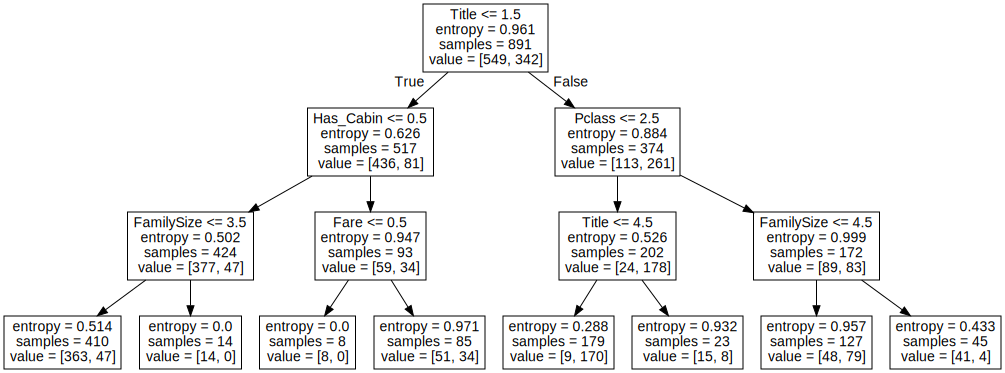

In [ ]:
from graphviz import Source
from IPython.display import SVG

graph = Source( tree.export_graphviz(decision_tree, out_file=None, feature_names=X_train.columns))
SVG(graph.pipe(format='svg'))

In [ ]:
dephts = range(1, 11)

for criterion in criterions:
    for min_sample_leaf in range(1, 11):
        print(f'Criterion: {criterion}, Min_leaf: {min_sample_leaf} \n')
        for max_depth in dephts:
            decision_tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_sample_leaf, criterion=criterion)
            cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring='accuracy')
            print(f"\t Max depth: {max_depth} \t CV mean score: {cv_scores.mean()}")

Criterion: gini, Min_leaf: 1 

	 Max depth: 1 	 CV mean score: 0.7822846441947565
	 Max depth: 2 	 CV mean score: 0.7912983770287141
	 Max depth: 3 	 CV mean score: 0.8305243445692885
	 Max depth: 4 	 CV mean score: 0.8125468164794007
	 Max depth: 5 	 CV mean score: 0.8125717852684143
	 Max depth: 6 	 CV mean score: 0.8059051186017477
	 Max depth: 7 	 CV mean score: 0.8148564294631709
	 Max depth: 8 	 CV mean score: 0.8115230961298379
	 Max depth: 9 	 CV mean score: 0.8249687890137329
	 Max depth: 10 	 CV mean score: 0.8193882646691636
Criterion: gini, Min_leaf: 2 

	 Max depth: 1 	 CV mean score: 0.7822846441947565
	 Max depth: 2 	 CV mean score: 0.7912983770287141
	 Max depth: 3 	 CV mean score: 0.8305243445692885
	 Max depth: 4 	 CV mean score: 0.8125468164794007
	 Max depth: 5 	 CV mean score: 0.8148189762796504
	 Max depth: 6 	 CV mean score: 0.8126342072409489
	 Max depth: 7 	 CV mean score: 0.8204744069912608
	 Max depth: 8 	 CV mean score: 0.8171285892634208
	 Max depth: 9 	 CV

**Maksymalna glębokość drzewa wpływa na dokładność modelu, ponieważ określą poziom do którego drzewo będzie się "budowało" i podejmowało decyzje. Moeżemy zauważyć, że od pewnej głębokości drzewa (tj. 3), dokładność modelu zaczyna spadać ze względu na przeuczanie modelu.**

**Min Sample leaf określa minimalną liczbę próbek, dla której będzie przebiegal proces decyzyjny w ramach jednego liścia. Parametr ten wpływa na dokładność modelu ale w nieco mniejszym stopniu niż maksymalna głębokość.**

**Kryterium giniego zdaję się działać nieco szybciej niż kryterium entropi. Jednak warto zauważyć, że entropia daje nieco lepsze wyniki.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
decision_tree = tree.DecisionTreeClassifier(max_depth=best_depht_entropy, criterion='entropy')
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
y_pred = decision_tree.predict(X_test)

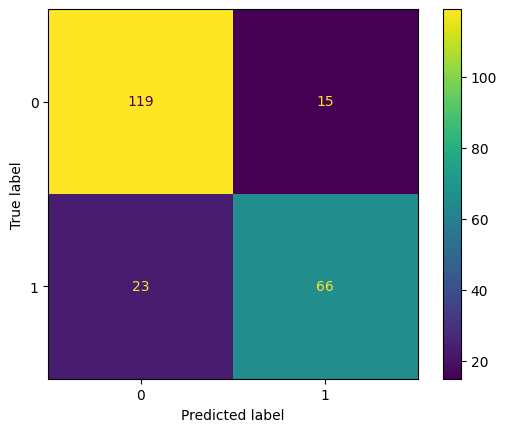

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot()
plt.show()

**119 osób nie przeżyło i model się nie mylił.**

**23 osoby przeżyły ale model je uśmiercił.**

**15 osób nie przeżyło ale model uznał je za żywe ☹.**

**66 osób nie przeżyło i model się nie mylił.**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       134
           1       0.81      0.74      0.78        89

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



# Zadanie 6

## Iris

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
X_iris, y_iris = datasets.load_iris(return_X_y=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

neighbors = [1, 3, 5, 7]
metrics = ['euclidean', 'manhattan']
weights = ['uniform', 'distance']

for metric in metrics:
    print(f'\n Metric: {metric}')
    for n_neighbors in neighbors:
        print(f'\t N_neighbors = {n_neighbors}')
        for weight in weights:
            knn = KNN(n_neighbors=n_neighbors, metric=metric, weights=weight)
            accuracy = cross_val_score(knn, X_train, y_train, cv=10).mean()
            print(f'\t\t weights = {weight}, \n\t\t\t accuracy = {accuracy}')


 Metric: euclidean
	 N_neighbors = 1
		 weights = uniform, 
			 accuracy = 0.9618181818181819
		 weights = distance, 
			 accuracy = 0.9618181818181819
	 N_neighbors = 3
		 weights = uniform, 
			 accuracy = 0.9618181818181819
		 weights = distance, 
			 accuracy = 0.9618181818181819
	 N_neighbors = 5
		 weights = uniform, 
			 accuracy = 0.9527272727272728
		 weights = distance, 
			 accuracy = 0.9618181818181819
	 N_neighbors = 7
		 weights = uniform, 
			 accuracy = 0.9609090909090909
		 weights = distance, 
			 accuracy = 0.9709090909090909

 Metric: manhattan
	 N_neighbors = 1
		 weights = uniform, 
			 accuracy = 0.9518181818181818
		 weights = distance, 
			 accuracy = 0.9518181818181818
	 N_neighbors = 3
		 weights = uniform, 
			 accuracy = 0.9618181818181819
		 weights = distance, 
			 accuracy = 0.9618181818181819
	 N_neighbors = 5
		 weights = uniform, 
			 accuracy = 0.9618181818181819
		 weights = distance, 
			 accuracy = 0.9618181818181819
	 N_neighbors = 7
		 weights 

**Metryka manhattan wydaje się działać nieco gorzej niż metryka euklidesowa, ponieważ w większości przypadków osiąga nieco niższe wyniki dokładności.**

**Użycie różnych wag (uniform i distance) nie ma dużego wpływu na wyniki dokładności klasyfikacji.**

**Najlepszą wartością parametru n_neighbors w większości przypadków okazała się być wartość 3 lub 7, jednak nie ma to dużego wpływu na dokładność klasyfikacji.**

**Najlepszą dokładność klasyfikacji (0,9709) uzyskano dla metryki euklidesowej i użycia parametru n_neighbors równego 7 oraz użycia wag distance.**

## NYT

In [ ]:
data = pd.read_csv('nyt-frame.csv', header=0)
X = data.iloc[:, 9:].values
y = data.iloc[:, 1].values

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

neighbors = [1, 3, 5, 7]
metrics = ['euclidean', 'manhattan']
weights = ['uniform', 'distance']

for metric in metrics:
    print(f'\n Metric: {metric}')
    for n_neighbors in neighbors:
        print(f'\t N_neighbors = {n_neighbors}')
        for weight in weights:
            knn = KNN(n_neighbors=n_neighbors, metric=metric, weights=weight)
            accuracy = cross_val_score(knn, X_train, y_train, cv=10).mean()
            print(f'\t\t weights = {weight}, \n\t\t\t accuracy = {accuracy}')


 Metric: euclidean
	 N_neighbors = 1
		 weights = uniform, 
			 accuracy = 0.8589285714285715
		 weights = distance, 
			 accuracy = 0.8589285714285715
	 N_neighbors = 3
		 weights = uniform, 
			 accuracy = 0.8875
		 weights = distance, 
			 accuracy = 0.8875
	 N_neighbors = 5
		 weights = uniform, 
			 accuracy = 0.8857142857142858
		 weights = distance, 
			 accuracy = 0.8714285714285713
	 N_neighbors = 7
		 weights = uniform, 
			 accuracy = 0.8714285714285713
		 weights = distance, 
			 accuracy = 0.8571428571428571

 Metric: manhattan
	 N_neighbors = 1
		 weights = uniform, 
			 accuracy = 0.8321428571428571
		 weights = distance, 
			 accuracy = 0.8321428571428571
	 N_neighbors = 3
		 weights = uniform, 
			 accuracy = 0.8428571428571427
		 weights = distance, 
			 accuracy = 0.8428571428571427
	 N_neighbors = 5
		 weights = uniform, 
			 accuracy = 0.8571428571428571
		 weights = distance, 
			 accuracy = 0.8571428571428571
	 N_neighbors = 7
		 weights = uniform, 
			 accuracy

**Metryka manhattan wydaje się działać nieco gorzej niż metryka euklidesowa, ponieważ w większości przypadków osiąga niższe wyniki dokładności.**

**W tym przypadku użycie różnych wag (uniform i distance) również nie ma dużego wpływu na wyniki dokładności klasyfikacji.**

**Najlepszą wartością parametru n_neighbors okazała się być wartość 3 dla obu metryk.**

**Użycie wag distance czasami wpłynęło negatywnie na wyniki dokładności dla większej liczby sąsiadów (n_neighbors), szczególnie dla metryki euklidesowej.**

**Ogólnie dokładność klasyfikacji jest dość niska (około 85-89%), co sugeruje, że model klasyfikacji nie jest bardzo skuteczny dla tego zestawu danych.**

## KDTree

In [ ]:
import numpy as np

class KDNode:
    def __init__(self, data, split_dim=None, left=None, right=None):
        self.data = data
        self.split_dim = split_dim
        self.left = left
        self.right = right
        
class KDTree:
    def __init__(self, data):
        self.root = self._build(data)
        
    def _build(self, data, depth=0):
        if not data.all():
            return None
        
        n = len(data.shape)
        split_dim = depth % n
        
        if (n-1) == depth:
            return KDNode(data[0], split_dim)
        
        data = data[np.argsort(data[:, split_dim])]
        mid = n // 2
        
        left = self._build(data[:mid], depth + 1)
        right = self._build(data[mid+1:], depth + 1)
        
        return KDNode(data[mid], split_dim, left, right)
    
    def _query(self, node, point, k, dist_func, return_distances=True, best=None):
        if node is None:
            return [], []
        
        dim = node.split_dim
        dist = dist_func(point, node.data)
        dx = point[dim] - node.data[dim]
        
        if best is None:
            best = [(dist, node.data)]
        else:
            best.append((dist, node.data))
            best.sort(key=lambda x: x[0])
            best = best[:k]
        
        if dx <= 0:
            self._query(node.left, point, k, dist_func, return_distances, best)
            if dx * dx < best[-1][0] or len(best) < k:
                self._query(node.right, point, k, dist_func, return_distances, best)
        else:
            self._query(node.right, point, k, dist_func, return_distances, best)
            if dx * dx < best[-1][0] or len(best) < k:
                self._query(node.left, point, k, dist_func, return_distances, best)
        
        if return_distances:
            return best
        else:
            return [x[1] for x in best]
    
    def query(self, point, k=1, dist_func='euclidean', return_distances=True):
        if isinstance(dist_func, str):
            dist_func = getattr(self, dist_func)
        if len(point.shape) == 1:
            point = point.reshape(1, -1)
        nodes = self._query(self.root, point[0], k, dist_func, return_distances)
        if return_distances:
            return np.array([x[0] for x in nodes]), np.array([x[1] for x in nodes])
        else:
            return np.array(nodes)
    
    def euclidean(self, p1, p2):
        return np.sqrt(np.sum((p1 - p2) ** 2))
    
    def manhattan(self, p1, p2):
        return np.sum(np.abs(p1 - p2))


In [ ]:
tree = KDTree(X_iris)

random_index = np.random.randint(0, high=X_iris.shape[0])

distances, samples = tree.query(X_iris[random_index], k=3)

print(f"Point which we look for nearest neighbours: \n{X_iris[random_index]}")
print(f"Distances for nearest neighbours: \n{distances}")
print(f"Neares neighbours: \n{samples}")

Point which we look for nearest neighbours: 
[4.8 3.1 1.6 0.2]
Distances for nearest neighbours: 
[0.50990195 0.50990195 0.72111026]
Neares neighbours: 
[[4.4 3.2 1.3 0.2]
 [4.4 3.  1.3 0.2]
 [4.3 3.  1.1 0.1]]


# Lasy Losowe

## Titanic

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3, random_state=0)

In [ ]:
X = train.loc[:, train.columns != 'Survived']
y = train.loc[:, 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred =clf.predict(X_test)

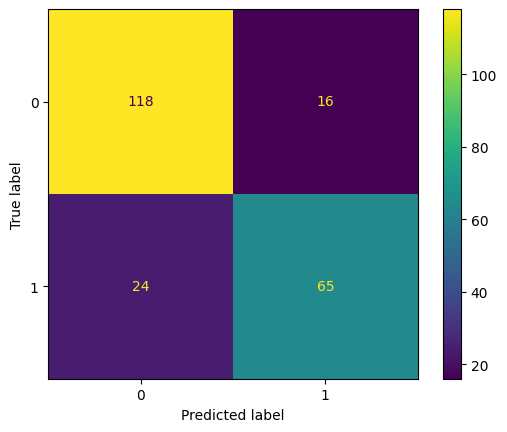

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       134
           1       0.80      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



**Oba modele klasyfikacji, drzewo decyzyjne i las losowy, mają podobne wyniki precyzji (precision), czułości (recall) i miary F1 (f1-score). Wynik accuracy dla drzewa decyzyjnego wynosi 0,83, podczas gdy dla lasu losowego wynosi 0,82, co oznacza, że drzewo decyzyjne wydaje się mieć nieco lepszą zdolność do poprawnej klasyfikacji. Jednakże różnica ta jest niewielka i może być wynikiem losowej zmienności danych. Warto zwrócić uwagę na niskie wartości miary F1 dla klasy 1 w obu modelach, co sugeruje, że modele mają trudności w poprawnej klasyfikacji tej klasy.**

## Iris

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris)

In [ ]:
dephts = range(2, 7)

for criterion in criterions:
    for min_sample_leaf in range(1, 11):
        print(f'Criterion: {criterion}, Min_leaf: {min_sample_leaf} \n')
        for max_depth in dephts:
            clf = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_sample_leaf, criterion=criterion)
            cv_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
            print(f"\t Max depth: {max_depth} \t CV mean score: {cv_scores.mean()}")

Criterion: gini, Min_leaf: 1 

	 Max depth: 2 	 CV mean score: 0.9518181818181819
	 Max depth: 3 	 CV mean score: 0.9518181818181819
	 Max depth: 4 	 CV mean score: 0.9518181818181819
	 Max depth: 5 	 CV mean score: 0.9518181818181819
	 Max depth: 6 	 CV mean score: 0.9518181818181819
Criterion: gini, Min_leaf: 2 

	 Max depth: 2 	 CV mean score: 0.9618181818181817
	 Max depth: 3 	 CV mean score: 0.9618181818181817
	 Max depth: 4 	 CV mean score: 0.9718181818181819
	 Max depth: 5 	 CV mean score: 0.9618181818181817
	 Max depth: 6 	 CV mean score: 0.9618181818181817
Criterion: gini, Min_leaf: 3 

	 Max depth: 2 	 CV mean score: 0.9618181818181817
	 Max depth: 3 	 CV mean score: 0.9618181818181817
	 Max depth: 4 	 CV mean score: 0.9518181818181819
	 Max depth: 5 	 CV mean score: 0.9618181818181817
	 Max depth: 6 	 CV mean score: 0.9618181818181817
Criterion: gini, Min_leaf: 4 

	 Max depth: 2 	 CV mean score: 0.9618181818181817
	 Max depth: 3 	 CV mean score: 0.9618181818181817
	 Max dep

**Ogólnie wyniki są dobre, ponieważ średnie wyniki walidacji krzyżowej (CV mean score) wynoszą od 0.95 do 0.97 dla większości zestawów parametrów.**

**Dla kryterium gini, przy minimalnej liczbie próbek w liściu wynoszącej 2 i maksymalnej głębokości drzewa wynoszącej 4, uzyskano najlepszy wynik walidacji krzyżowej wynoszący 0.97. Jednakże, w większości przypadków wyniki są bardzo podobne i trudno wybrać jeden zestaw parametrów jako najlepszy.**

**W przypadku kryterium entropy, wyniki są nieznacznie lepsze dla niektórych zestawów parametrów, ale wciąż są bardzo podobne do tych uzyskanych dla kryterium gini.**

**Ogólnie rzecz biorąc, wyniki uzyskane dla lasów losowych są zadowalające i potwierdzają ich popularność jako skutecznego algorytmu uczenia maszynowego do klasyfikacji i regresji.**

## NYT

In [ ]:
data = pd.read_csv('nyt-frame.csv', header=0)
X = data.iloc[:, 9:].values
y = data.iloc[:, 1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
dephts = range(2, 7)

for criterion in criterions:
    for min_sample_leaf in range(1, 11):
        print(f'Criterion: {criterion}, Min_leaf: {min_sample_leaf} \n')
        for max_depth in dephts:
            clf = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_sample_leaf, criterion=criterion)
            cv_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
            print(f"\t Max depth: {max_depth} \t CV mean score: {cv_scores.mean()}")

Criterion: gini, Min_leaf: 1 

	 Max depth: 2 	 CV mean score: 0.8035714285714286
	 Max depth: 3 	 CV mean score: 0.7875
	 Max depth: 4 	 CV mean score: 0.8017857142857142
	 Max depth: 5 	 CV mean score: 0.8017857142857142
	 Max depth: 6 	 CV mean score: 0.8285714285714285
Criterion: gini, Min_leaf: 2 

	 Max depth: 2 	 CV mean score: 0.775
	 Max depth: 3 	 CV mean score: 0.7160714285714286
	 Max depth: 4 	 CV mean score: 0.8446428571428571
	 Max depth: 5 	 CV mean score: 0.7589285714285714
	 Max depth: 6 	 CV mean score: 0.8017857142857142
Criterion: gini, Min_leaf: 3 

	 Max depth: 2 	 CV mean score: 0.8178571428571428
	 Max depth: 3 	 CV mean score: 0.8035714285714286
	 Max depth: 4 	 CV mean score: 0.8303571428571429
	 Max depth: 5 	 CV mean score: 0.8589285714285715
	 Max depth: 6 	 CV mean score: 0.7999999999999999
Criterion: gini, Min_leaf: 4 

	 Max depth: 2 	 CV mean score: 0.7607142857142858
	 Max depth: 3 	 CV mean score: 0.7857142857142857
	 Max depth: 4 	 CV mean score: 0.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
dephts = range(2, 7)

for criterion in criterions:
    for min_sample_leaf in range(1, 11):
        print(f'Criterion: {criterion}, Min_leaf: {min_sample_leaf} \n')
        for max_depth in dephts:
            clf = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_sample_leaf, criterion=criterion)
            cv_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
            print(f"\t Max depth: {max_depth} \t CV mean score: {cv_scores.mean()}")

Criterion: gini, Min_leaf: 1 

	 Max depth: 2 	 CV mean score: 0.875
	 Max depth: 3 	 CV mean score: 0.8892857142857145
	 Max depth: 4 	 CV mean score: 0.8892857142857145
	 Max depth: 5 	 CV mean score: 0.9035714285714287
	 Max depth: 6 	 CV mean score: 0.9178571428571429
Criterion: gini, Min_leaf: 2 

	 Max depth: 2 	 CV mean score: 0.9178571428571429
	 Max depth: 3 	 CV mean score: 0.9035714285714287
	 Max depth: 4 	 CV mean score: 0.9178571428571429
	 Max depth: 5 	 CV mean score: 0.9178571428571429
	 Max depth: 6 	 CV mean score: 0.9035714285714287
Criterion: gini, Min_leaf: 3 

	 Max depth: 2 	 CV mean score: 0.9035714285714285
	 Max depth: 3 	 CV mean score: 0.9035714285714285
	 Max depth: 4 	 CV mean score: 0.9178571428571429
	 Max depth: 5 	 CV mean score: 0.9178571428571429
	 Max depth: 6 	 CV mean score: 0.9035714285714285
Criterion: gini, Min_leaf: 4 

	 Max depth: 2 	 CV mean score: 0.9035714285714285
	 Max depth: 3 	 CV mean score: 0.9178571428571429
	 Max depth: 4 	 CV me

**Dla danych nieprzeprocesowanych algorytm uzyskał średnią trafność predykcji (CV mean score) oscylującą między 0,68 a 0,86 w zależności od parametrów. Oznacza to, że las losowy uzyskał wyniki przewyższające losowość, ale jakość ta jest niska w porównaniu z wynikami osiąganymi dla przetworzonych danych. Wyniki te sugerują, że dane przed wykonaniem PCA mają zbyt wiele zmiennych objaśniających lub te zmienne nie są dostatecznie skorelowane z cechami, których wartości chcemy przewidywać. Dlatego przeprowadzono PCA, aby zmniejszyć wymiarowość danych i usunąć korelacje między nimi.**

**Warto zauważyć, że w przypadku danych po wykonaniu PCA wyniki osiągane przez lasy losowe były znacznie lepsze niż dla danych nieprzetworzonych. Wartości trafności predykcji wzrosły o około 10% dla wszystkich wartości parametrów, osiągając poziom około 0,9 dla większości ustawień parametrów. Oznacza to, że dane po wykonaniu PCA są bardziej skorelowane z cechami, których wartości chcemy przewidywać, a zredukowanie liczby wymiarów zmniejszyło ilość szumu i zbędnych informacji w danych. Wnioskiem jest, że przeprowadzenie PCA na danych przed budową modelu może przynieść korzyści w postaci poprawy jakości predykcji i zmniejszenia wymagań obliczeniowych.**